In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [2]:
!pip install scikit-image

In [4]:
import zipfile
import io

# Assuming 'uploaded' is a dictionary containing the uploaded file

# Open the zip file
with open('/content/drive/MyDrive/seg_pred.zip', 'rb') as file:
    with zipfile.ZipFile(io.BytesIO(file.read()), "r") as zf:
        # Specify the target directory path
        target_directory = '/tmp/'  # Replace with your desired target directory

        # Extract all contents to the target directory
        zf.extractall(target_directory)

# Now, the contents of the zip file should be extracted to the specified directory.


In [5]:
import os
for dirname, _, filenames in os.walk('/tmp/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/tmp/seg_pred/seg_pred/3754.jpg
/tmp/seg_pred/seg_pred/20391.jpg
/tmp/seg_pred/seg_pred/18688.jpg
/tmp/seg_pred/seg_pred/14484.jpg
/tmp/seg_pred/seg_pred/22270.jpg
/tmp/seg_pred/seg_pred/18491.jpg
/tmp/seg_pred/seg_pred/5000.jpg
/tmp/seg_pred/seg_pred/18554.jpg
/tmp/seg_pred/seg_pred/22582.jpg
/tmp/seg_pred/seg_pred/14895.jpg
/tmp/seg_pred/seg_pred/8721.jpg
/tmp/seg_pred/seg_pred/17327.jpg
/tmp/seg_pred/seg_pred/12298.jpg
/tmp/seg_pred/seg_pred/19751.jpg
/tmp/seg_pred/seg_pred/12321.jpg
/tmp/seg_pred/seg_pred/11565.jpg
/tmp/seg_pred/seg_pred/2244.jpg
/tmp/seg_pred/seg_pred/10818.jpg
/tmp/seg_pred/seg_pred/15878.jpg
/tmp/seg_pred/seg_pred/10629.jpg
/tmp/seg_pred/seg_pred/10897.jpg
/tmp/seg_pred/seg_pred/21109.jpg
/tmp/seg_pred/seg_pred/327.jpg
/tmp/seg_pred/seg_pred/22505.jpg
/tmp/seg_pred/seg_pred/11330.jpg
/tmp/seg_pred/seg_pred/17482.jpg
/tmp/seg_pred/seg_pred/17276.jpg
/tmp/seg_pred/seg_pred/17778.jpg
/tmp/seg_pred/seg_pred/18127.jp

In [22]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

print("class_names_label", class_names_label)
print("nb_classes", nb_classes)

IMAGE_SIZE = (150, 150)

class_names_label {'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}
nb_classes 6


In [6]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def load_data():
    datasets = ['/tmp/seg_train/seg_train', '/tmp/seg_test/seg_test']
    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)


                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        # Display the original image
        plt.imshow(images[0])
        plt.title(f'Category: {folder}')
        plt.show()


        images_array = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')

        output.append((images_array, labels))

    return output


Loading /tmp/seg_train/seg_train


100%|██████████| 2512/2512 [00:03<00:00, 760.33it/s] 


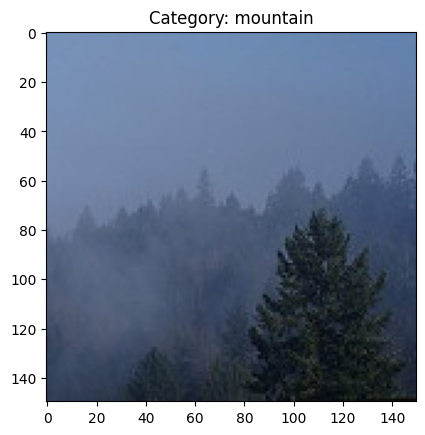

Loading /tmp/seg_test/seg_test


100%|██████████| 525/525 [00:00<00:00, 968.17it/s] 


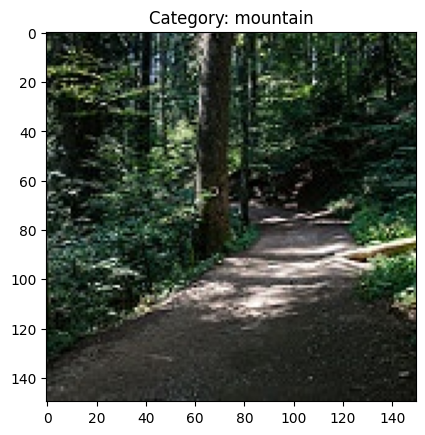

In [7]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [8]:
#Normalization

train_images = train_images / 255.0
test_images = test_images / 255.0

#Applying PCA

#Question 1

In [9]:
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage.transform import resize

def load_and_preprocess_images(root_folder, target_size=(64, 64)):
    images = []

    for filename in os.listdir(root_folder):
        img_path = os.path.join(root_folder, filename)

        # Open and resize the img
        img = Image.open(img_path)
        img = img.convert('L')  # Convert images to grayscale
        img_array = np.array(img)  # Convert image to numpy array

        # Resize images to the target size
        img_array = resize(img_array, target_size, anti_aliasing=True)

        images.append(img_array)

    return images

def pca_red(images, output_size=(64, 64)):
    n_images = len(images)
    image_size = images[0].shape[0] * images[0].shape[1]

    # Flatten grayscale images into a 2D format
    image_data = np.array([img.flatten() for img in images])

    # Set n_components based on the desired output size (64x64)
    n_components = image_data.shape[1]

    pca = PCA(n_components=n_components)
    reduced_images = pca.fit_transform(image_data)

    return pca, reduced_images

def plot_images(images, n_images, title, num_rows, num_cols, image_shape=(64, 64)):
    # Reduce the overall figure size
    fig = plt.figure(figsize=(10, 6))

    # Set the title for the entire figure
    plt.suptitle(title, fontsize=16)

    for i in range(n_images):
        # Create larger individual plots by adjusting the figsize for each subplot
        ax = plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
        ax.imshow(images[i].reshape(image_shape), cmap='gray')
        ax.axis('off')
        ax.set_aspect('equal', adjustable='box')

    # Adjust layout for the title
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


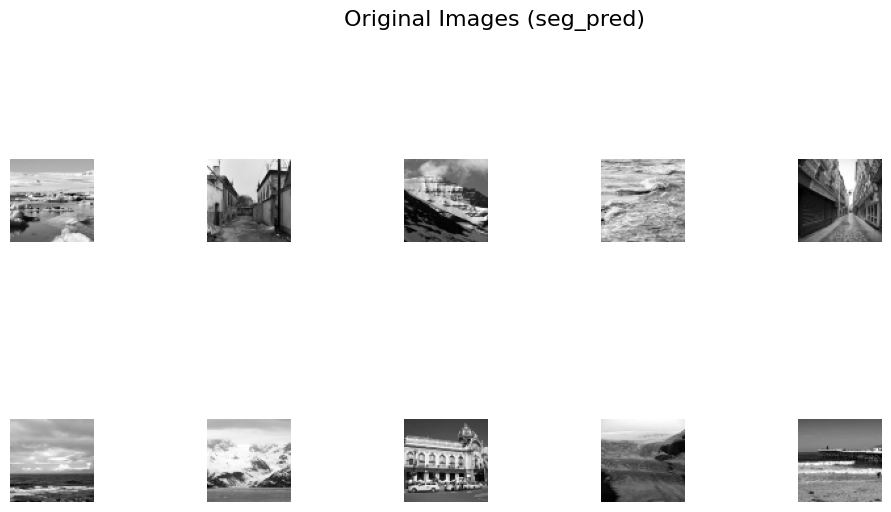

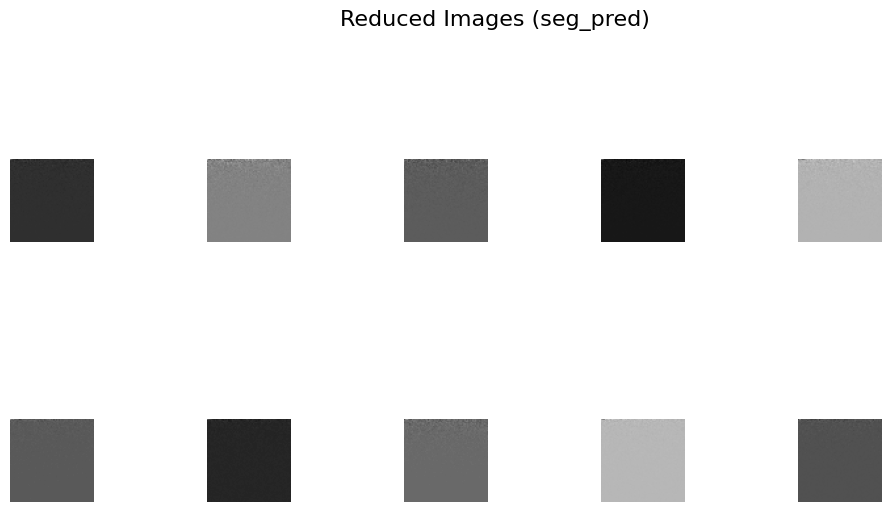

In [13]:
# Load and preprocess images from all categories within 'seg_train'
root_folder = '/tmp/seg_pred/seg_pred'
images = load_and_preprocess_images(root_folder, (64,64))

# Apply PCA on all images from 'seg_train'
pca_reduced, images_reduced = pca_red(images)

# Plot some original and reduced images from 'seg_train'
plot_images(images, n_images=10, title='Original Images (seg_pred)', num_rows=2, num_cols=5)

plot_images(images_reduced,n_images=10, title='Reduced Images (seg_pred)', num_rows=2, num_cols=5)


#### Images are going gray and black which implies loss of data due significantly reduced number of components while doing PCA, has addressed that in the next step while keeping number of components = 2.

#Question 2

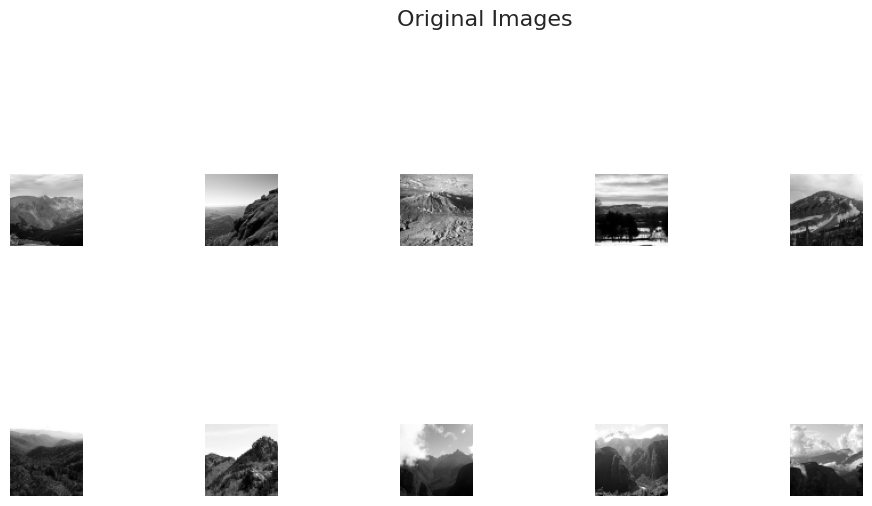

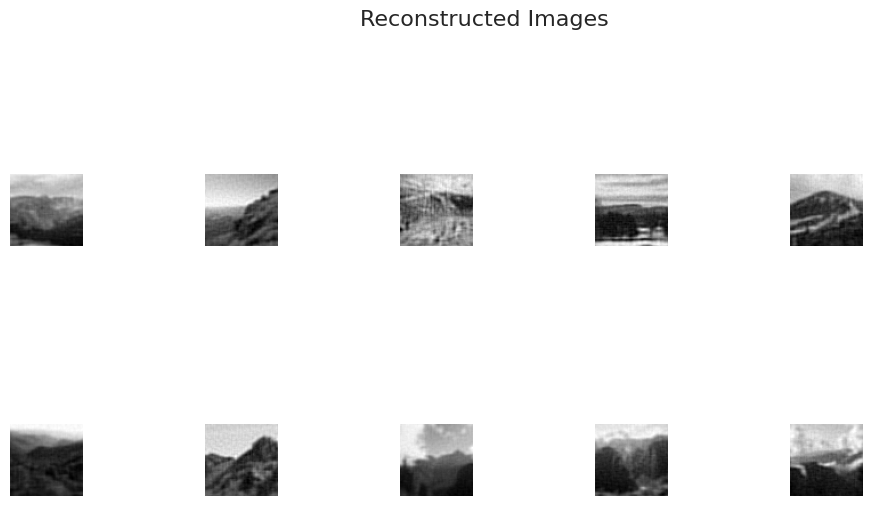

In [72]:
n_images_to_plot = 10
original_images = train_images[:n_images_to_plot]

# Apply PCA to the original images to reconstruct them
flattened_original_images = np.array(original_images).reshape(n_images_to_plot, -1)
reconstructed_images = pca_reduced.inverse_transform(pca_reduced.transform(flattened_original_images))

plot_images(original_images, n_images_to_plot, title='Original Images', num_rows=2, num_cols=5)
plt.show()

plot_images(reconstructed_images, n_images_to_plot, title='Reconstructed Images', num_rows=2, num_cols=5)
plt.show()

#### Here the images seems better after reduction

#Question 3A

#PCA with 2 components only

In [14]:
image_folder = '/tmp/seg_pred/seg_pred'

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image
from skimage.transform import resize

from skimage.transform import rescale

def load_and_preprocess_images(root_folder, target_size=(64, 64), downsampling_factor=0.5, class_names_label=class_names_label):
    images = []
    labels = []

    for category in os.listdir(root_folder):
        category_path = os.path.join(root_folder, category)

        if os.path.isdir(category_path):
            label = class_names_label[category]

            for filename in os.listdir(category_path):
                img_path = os.path.join(category_path, filename)

                # Open and resize the img
                img = Image.open(img_path)
                img = img.convert('L')  # Convert images to grayscale
                img_array = np.array(img)  # Convert image to numpy array

                # Resize images with downsampling
                img_array = rescale(img_array, downsampling_factor, anti_aliasing=True)

                # Resize images to the target size
                img_array = resize(img_array, target_size, anti_aliasing=True)

                images.append(img_array)
                labels.append(label)

    return images, labels

def apply_pca(images, n_components=2):
    # n_images = len(images)
    # image_size = images[0].shape[0] * images[0].shape[1]
    image_data = np.array([img.flatten() for img in images])

    pca = PCA(n_components=n_components)
    pca.fit(image_data)

    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    total_variance_explained = cumulative_variance_ratio[-1]

    print(f"Total variance explained by {n_components} components: {total_variance_explained:.2f}")

    return pca

def main():
    image_folder = '/tmp/seg_train/seg_train/'
    images, labels = load_and_preprocess_images(image_folder)
    pca = apply_pca(images, n_components=2)

if __name__ == "__main__":
    main()


Total variance explained by 2 components: 0.42


# Plotting Scatter plot with PCA,T-SNE,MDS

PCA


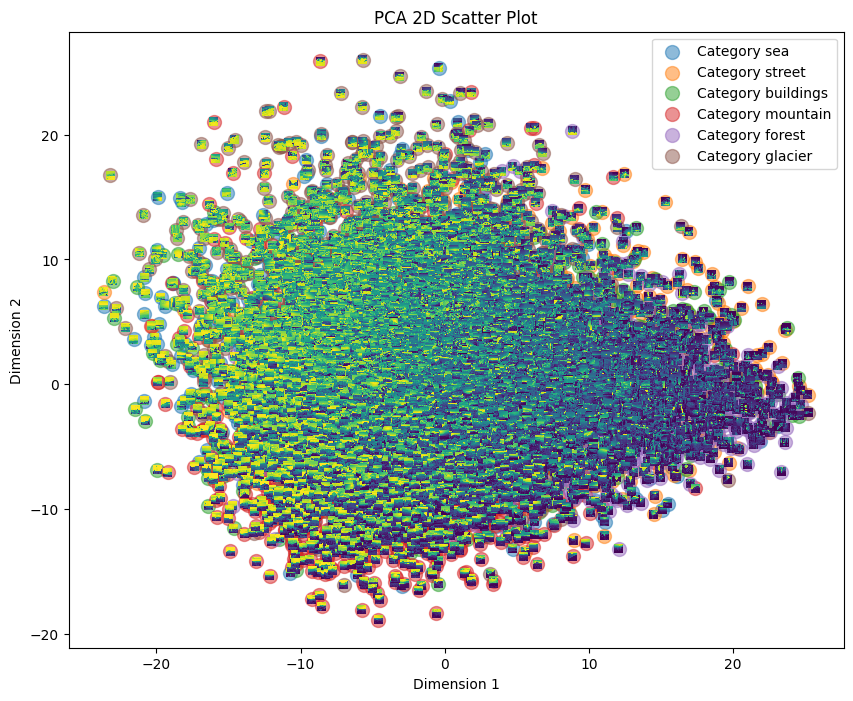

t-SNE


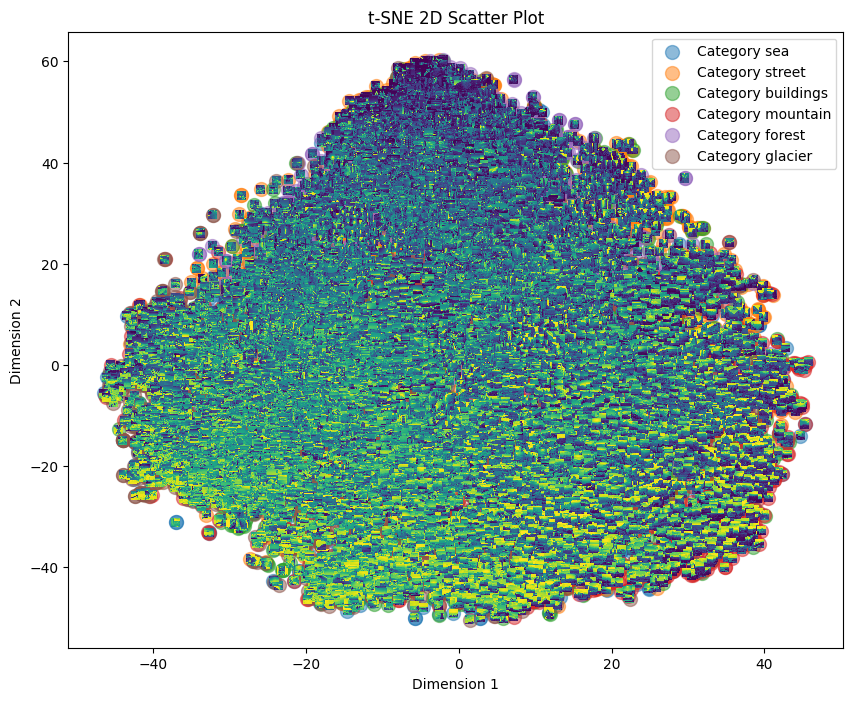

LLE


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Function to load and preprocess images
def load_and_preprocess_images(root_folder, target_size=(64, 64)):
    images = []
    labels = []

    for category in os.listdir(root_folder):
        category_path = os.path.join(root_folder, category)

        if os.path.isdir(category_path):
            label = category  # Assuming the category name itself is the label

            for filename in os.listdir(category_path):
                img_path = os.path.join(category_path, filename)

                # Open and resize the img
                img = Image.open(img_path)
                img = img.convert('L')  # Convert images to grayscale
                img_array = np.array(img)  # Convert image to numpy array

                # Resize images to the target size
                img_array = resize(img_array, target_size, anti_aliasing=True)

                images.append(img_array)
                labels.append(label)

    return images, labels

# Function to apply dimensionality reduction and create a scatter plot with small rock images
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def apply_reduction_and_plot(images, categories, n_components=2, method_name="PCA"):
    n_images = len(images)

    # Convert images to grayscale and flatten to 1D array
    reference_shape = images[0].shape
    filtered_images = [img for img in images if img.shape == reference_shape]
    image_data = np.array([img.flatten() for img in filtered_images])

    if method_name == "PCA":
        method = PCA(n_components=n_components)
    elif method_name == "t-SNE":
        method = TSNE(n_components=n_components)
    elif method_name == "LLE":
        method = LocallyLinearEmbedding(n_components=n_components)
    elif method_name == "MDS":
        method = MDS(n_components=n_components)

    print(method_name)
    method_result = method.fit_transform(image_data)

    plt.figure(figsize=(10, 8))
    plt.gca().set_facecolor("white")  # Set background color to white

    # Create scatter plot with different colors for categories
    for category in set(categories):
        mask = [c == category for c in categories]
        plt.scatter(method_result[mask, 0], method_result[mask, 1], label=f'Category {category}', marker='o', s=100, alpha=0.5)

    plt.title(f"{method_name} 2D Scatter Plot")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")

    small_image_size = 0.1  # Adjust the size as needed
    for i in range(len(images)):
        img = OffsetImage(images[i], zoom=small_image_size)
        img_box = AnnotationBbox(img, method_result[i], frameon=False)
        plt.gca().add_artist(img_box)

    plt.legend()
    plt.show()


def main():
    image_folder = '/tmp/seg_train/seg_train/'
    images, categories = load_and_preprocess_images(image_folder)
    methods = ["PCA", "t-SNE", "LLE", "MDS"]
    #methods = ["PCA"]

    for method in methods:
        apply_reduction_and_plot(images, categories, n_components=2, method_name=method)

if __name__ == "__main__":
    main()


Though visually PCA figure might seems similar as t-SNE but I prefer t-SNE visualisations over others because:
1. It is particularly effective in preserving both local and global structures in the data. It aims to maintain pairwise similarities between data points in the high-dimensional space and their counterparts in the low-dimensional space. While LLE also focuses on preserving local relationships, it might struggle with global structures. MDS, on the other hand, tends to emphasize global structures but may not capture intricate local relationships.
2. It is a non-linear technique, which allows it to capture complex relationships that cannot be effectively modeled by linear methods.
3. Its ability to reveal clusters and groupings in the data. This makes it especially useful for visualizing high-dimensional data in a way that helps identify natural clusters. PCA gives a confusing plot for higher number of clusters.
5. It is robust to noise and can filter out irrelevant details easily.


# Which visualizations do you prefer? TBD

#K Means


Total variance explained by 2 components: 0.43


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

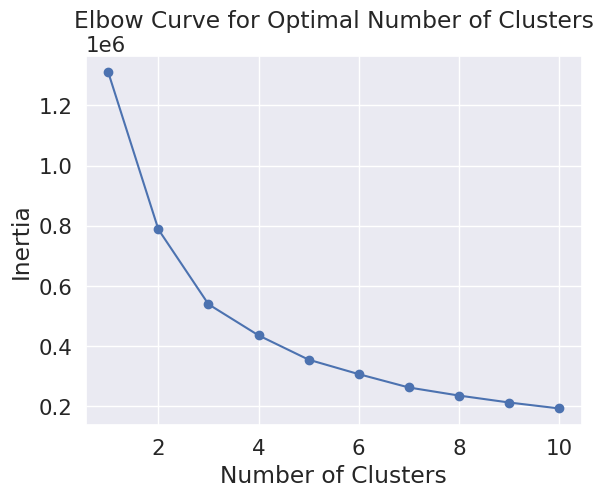

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


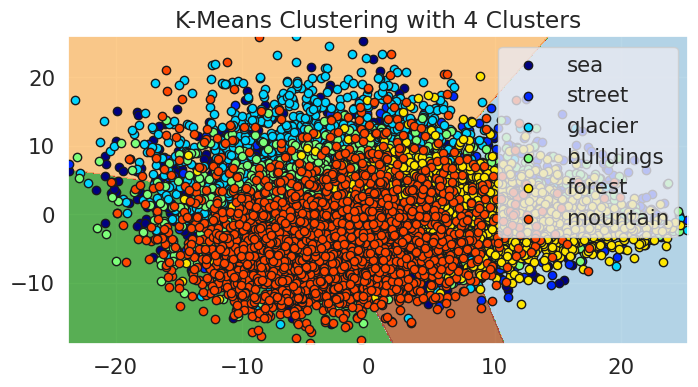

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


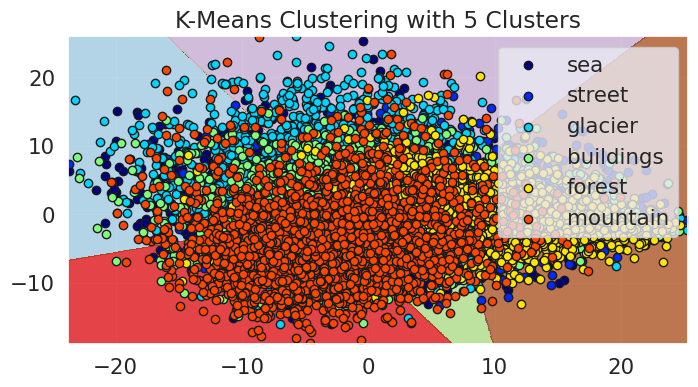

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


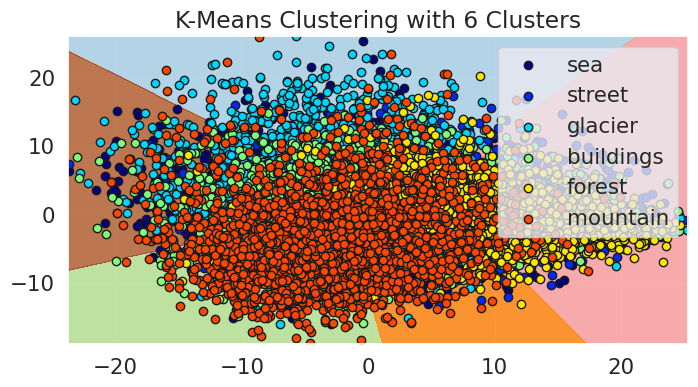

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


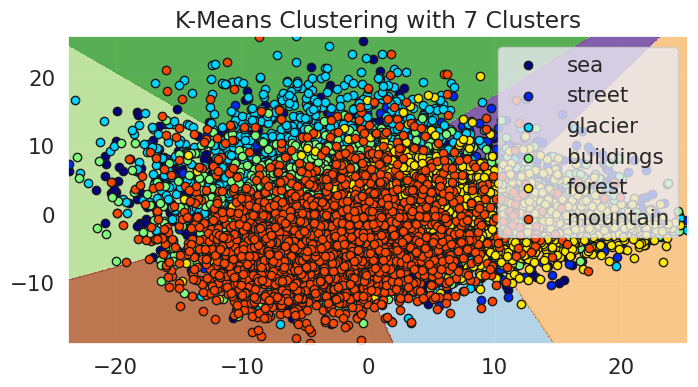

In [76]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image
from sklearn.cluster import KMeans

def load_and_preprocess_images(root_folder, target_size=(64, 64)):
    images = []
    labels = []

    for category in os.listdir(root_folder):
        category_path = os.path.join(root_folder, category)

        if os.path.isdir(category_path):
            label = category  # Assuming the category name itself is the label

            for filename in os.listdir(category_path):
                img_path = os.path.join(category_path, filename)

                # Open and resize the img
                img = Image.open(img_path)
                img = img.convert('L')  # Convert images to grayscale
                img_array = np.array(img)  # Convert image to numpy array

                # Resize images to the target size
                img_array = resize(img_array, target_size, anti_aliasing=True)

                images.append(img_array)
                labels.append(label)

    return images, labels

def plot_decision_boundaries(kmeans, X, labels):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                         np.linspace(mins[1], maxs[1], 1000))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Color data points based on labels
    unique_labels = list(set(labels))
    colors = [plt.cm.jet(label / len(unique_labels)) for label in range(len(unique_labels))]
    for i, label in enumerate(unique_labels):
        X_cluster = X[np.array(labels) == label]
        plt.scatter(X_cluster[:, 0], X_cluster[:, 1], label=label, c=[colors[i]], edgecolor='k')

    plt.title(f'K-Means Clustering with {kmeans.n_clusters} Clusters')

def generate_and_visualize_new_rocks(gmm, pca, n_samples=20):
    # Generate samples from the GMM
    generated_samples = gmm.sample(n_samples=n_samples)
    # Apply inverse PCA transformation to get the original image space
    original_samples = pca.inverse_transform(generated_samples)

    # Visualize the generated images
    fig, axes = plt.subplots(4, 5, figsize=(12, 10))
    for i, ax in enumerate(axes.ravel()):
        ax.imshow(original_samples[i].reshape(360, 480), cmap='gray')
        ax.axis('off')
        ax.set_title(f'Generated Rock {i+1}')

    plt.tight_layout()
    plt.show()

def find_optimal_clusters(data):
    """
    Find the optimal number of clusters using the elbow method.

    Parameters:
    - data: The input data for clustering.

    Returns:
    - inertia: List of inertia values for different numbers of clusters.
    - possible_clusters: List of possible cluster numbers.
    """
    inertia = []  # List to store inertia values
    possible_clusters = range(1, 11)  # You can adjust the range of possible clusters

    for num_clusters in possible_clusters:
        kmeans = KMeans(n_clusters=num_clusters, random_state=0)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    return inertia, possible_clusters

def plot_elbow(inertia, possible_clusters):
    """
    Plot the elbow curve to visualize the optimal number of clusters.

    Parameters:
    - inertia: List of inertia values for different numbers of clusters.
    - possible_clusters: List of possible cluster numbers.
    """
    plt.plot(possible_clusters, inertia, marker='o')
    plt.title('Elbow Curve for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()


def main():
    images, labels = load_and_preprocess_images(image_folder)
    n_components = 2
    pca = apply_pca(images, n_components)

    # Apply PCA on the data
    image_data = np.array(images).reshape(len(images), -1)
    image_data_pca = pca.transform(image_data)

    # Determine the optimal number of clusters using the elbow method
    inertia, possible_clusters = find_optimal_clusters(image_data_pca)
    plot_elbow(inertia, possible_clusters)

    # Select the optimal number of clusters (3)
    num_clusters = [4,5,6,7]
    for i in num_clusters:
      kmeans = KMeans(n_clusters=i, random_state=0)
      kmeans.fit(image_data_pca)

      # Plot the decision boundaries for the clusters and color data points based on labels
      plt.figure(figsize=(8, 4))
      plot_decision_boundaries(kmeans, image_data_pca, labels)
      plt.title(f'K-Means Clustering with {i} Clusters')
      plt.legend()
      plt.show()

if __name__ == "__main__":
    image_folder = '/tmp/seg_train/seg_train'
    main()


PCA is applied to reduce the dimensionality of the image data to two components. The code calculates and prints the total variance explained by the chosen number of components. The K-Means clustering algorithm is applied to find the optimal number of clusters (k).

It calculates the inertia (sum of squared distances of samples to their closest cluster center) for a range of possible cluster values (2 to a specified maximum, e.g., 7) using the elbow method. The elbow method helps determine the point at which adding more clusters doesn't significantly reduce the inertia. An elbow plot is displayed to visualize the inertia for different k values.The code then proceeds to perform K-Means clustering with multiple k values (in this case, k=4, 5, 6, and 7).

#### Elbow Curve:
The curve descent starts going down near 5 and 6 clusters which is close to the actual number of clusters. But its a little hard to differentiate between points using KNN clusters because there is visible imbalance of samples in the data. There are high number of mountain samples.

#Clustering images using EM

#Part 6

The best n componenets 3
Optimal number of components: 3


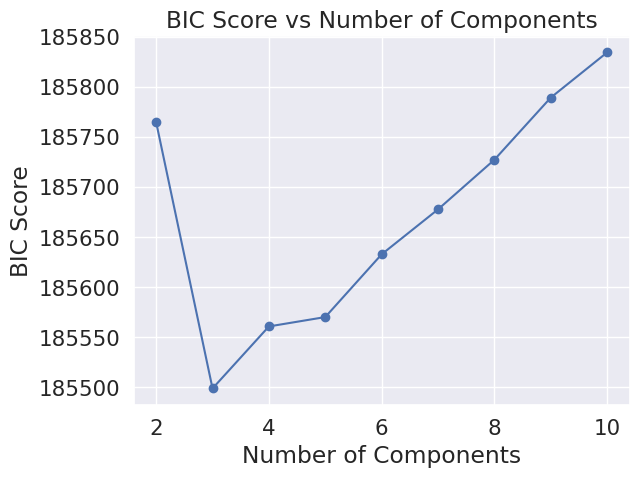

Optimal number of components (based on BIC): 3


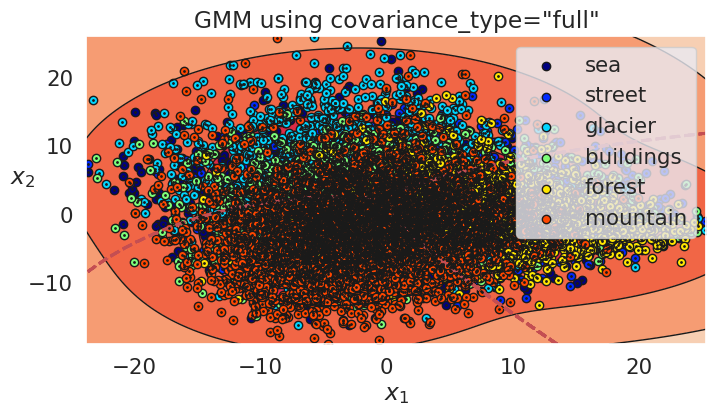

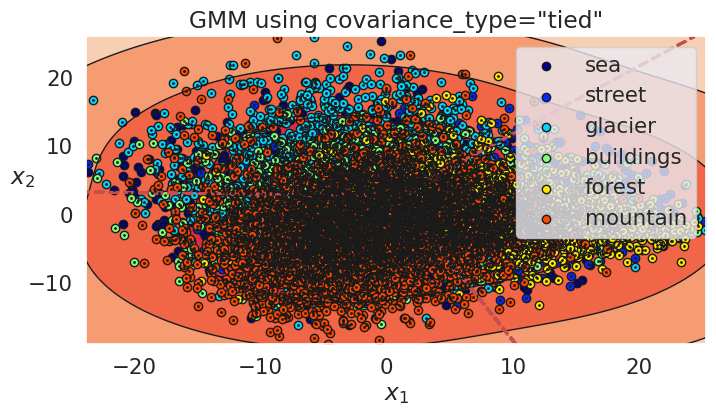

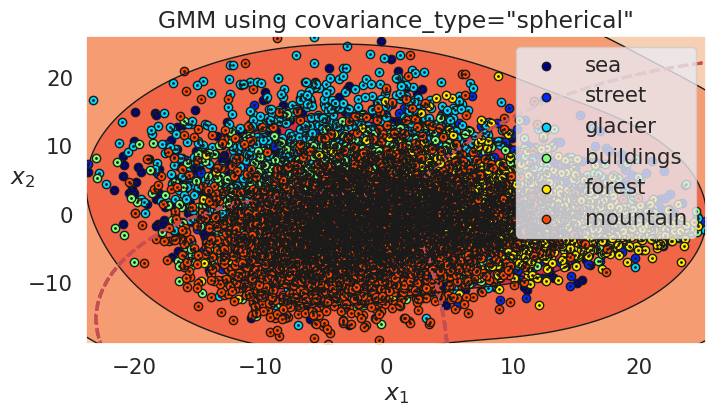

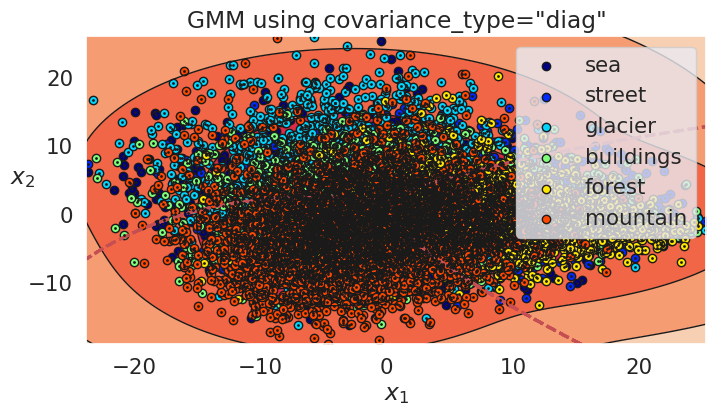

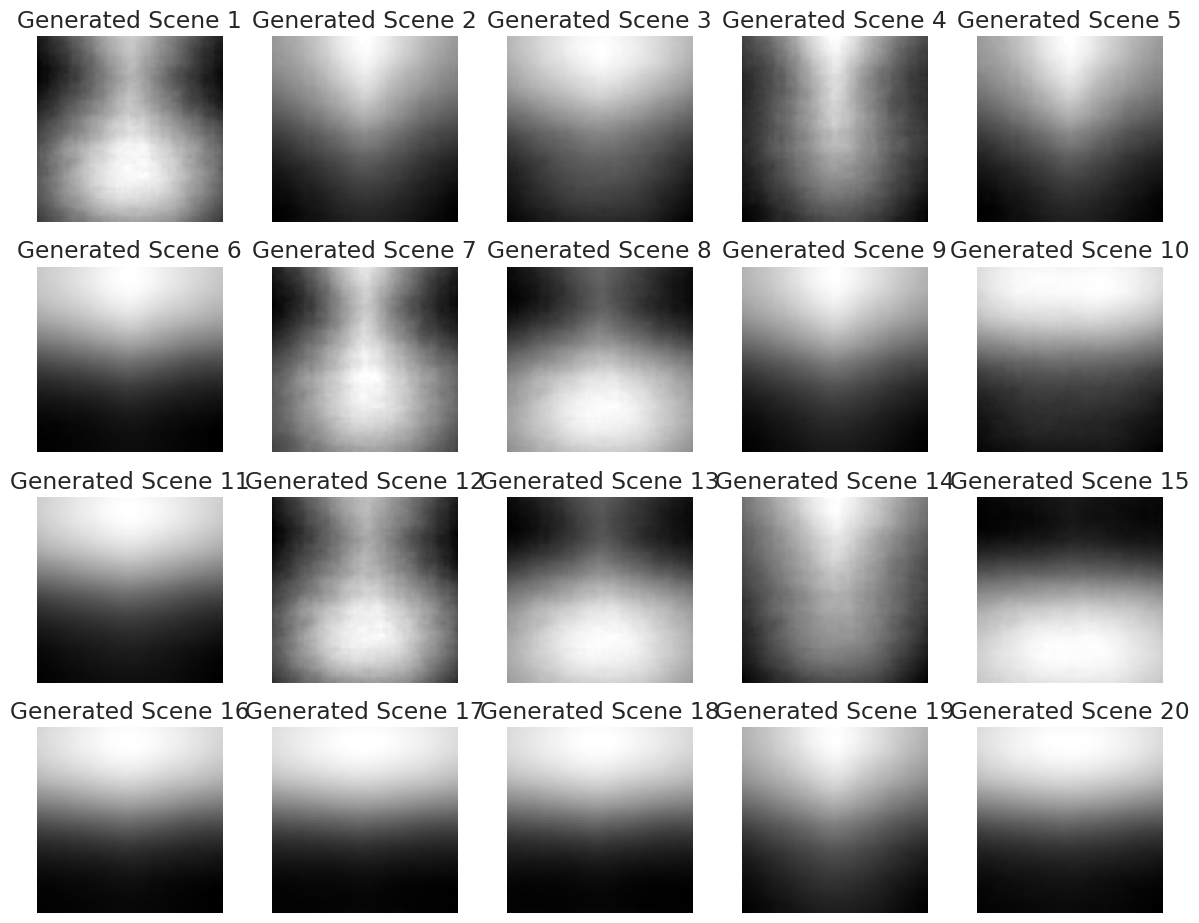

In [83]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from matplotlib.colors import LogNorm

# Load and preprocess images
def load_and_preprocess_images(root_folder, target_size=(64, 64)):
    images = []
    labels = []

    for category in os.listdir(root_folder):
        category_path = os.path.join(root_folder, category)

        if os.path.isdir(category_path):
            for filename in os.listdir(category_path):
                img_path = os.path.join(category_path, filename)

                # Open and resize the img
                img = Image.open(img_path)
                img = img.convert('L')  # Convert images to grayscale
                img_array = np.array(img)  # Convert image to numpy array

                # Resize images to the target size
                img_array = resize(img_array, target_size, anti_aliasing=True)

                images.append(img_array)
                labels.append(category)  # Assuming the category name itself is the label

    return images, labels


from sklearn.model_selection import GridSearchCV


def calculate_bic_scores(X, range_n_components):
    bic_scores = []
    for n in range_n_components:
        gmm = GaussianMixture(n_components=n, random_state=0)
        gmm.fit(X)
        bic = gmm.bic(X)
        bic_scores.append(bic)
    return bic_scores

# Plot Gaussian Mixture clusters
def plot_gaussian_mixture(clusterer, X, labels, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12), linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=2, colors='r', linestyles='dashed')

    unique_labels = list(set(labels))
    colors = [plt.cm.jet(label / len(unique_labels)) for label in range(len(unique_labels))]

    for i, label in enumerate(unique_labels):
        X_cluster = X[np.array(labels) == label]
        plt.scatter(X_cluster[:, 0], X_cluster[:, 1], label=label, c=[colors[i]], edgecolor='k')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)



def generate_and_visualize_new_scenes(gmm, pca, n_samples=20):
    # Generate samples from the GMM
    generated_samples, _ = gmm.sample(n_samples=n_samples)  # Use the first element of the tuple

    # Apply inverse PCA transformation to get the original image space
    print()
    original_samples = pca.inverse_transform(generated_samples)

    import math

    # Assuming len(images) is the total number of images
    total_images = len(original_samples)

    # Determine the number of rows and columns based on the total number of images
    num_rows = int(math.sqrt(total_images))
    num_cols = int(math.ceil(total_images / num_rows))

    # Create subplots dynamically
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

    for i, ax in enumerate(axes.ravel()):
        if i < total_images:
            ax.imshow(original_samples[i].reshape(64,64), cmap='gray')
            ax.axis('off')
            ax.set_title(f'Generated Scene {i+1}')
        else:
            ax.axis('off')  # Blank subplot for unused positions

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


#Calling the methods
image_folder = '/tmp/seg_train/seg_train'
images, labels = load_and_preprocess_images(image_folder)
n_components = 2
pca = PCA(n_components=n_components)
image_data = np.array(images).reshape(len(images), -1)
image_data_pca = pca.fit_transform(image_data)

range_n_components = range(2, 11)  # Range of components to consider






bic_scores = calculate_bic_scores(image_data_pca, range_n_components)

# Find the optimal number of components with the lowest BIC score
best_n_components = range_n_components[np.argmin(bic_scores)]
print("The best n componenets", best_n_components)
# Plot BIC scores
print(f"Optimal number of components: {best_n_components}")
plt.plot(range_n_components, bic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.title('BIC Score vs Number of Components')
plt.grid(True)
plt.show()
print(f"Optimal number of components (based on BIC): {best_n_components}")


gmm = GaussianMixture(n_components=best_n_components, random_state=42,covariance_type="full")
gmm.fit(image_data_pca)
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gmm, image_data_pca, labels)
plt.title('GMM using covariance_type="full"')
plt.legend()
plt.show()




gm_tied = GaussianMixture(n_components=best_n_components,  covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=best_n_components,  covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=best_n_components,  covariance_type="diag", random_state=42)

gm_tied.fit(image_data_pca)
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm_tied, image_data_pca, labels)
plt.title('GMM using covariance_type="tied"')
plt.legend()
plt.show()

gm_spherical.fit(image_data_pca)
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm_spherical, image_data_pca, labels)
plt.title('GMM using covariance_type="spherical"')
plt.legend()
plt.show()


gm_diag.fit(image_data_pca)
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm_diag, image_data_pca, labels)
plt.title('GMM using covariance_type="diag"')
plt.legend()
plt.show()

generate_and_visualize_new_scenes(gmm, pca)


##Load and Preprocess Images:

The code defines a function load_and_preprocess_images to load images from a specified folder (image_folder), convert them to grayscale, resize them to a target size (64x64 pixels), and store the image data and labels.
##PCA (Principal Component Analysis):

The code then applies PCA to reduce the dimensionality of the image data. The number of components (n_components) is set to 2.
##Determine Optimal Number of Components for GMM:

The code uses the Bayesian Information Criterion (BIC) to find the optimal number of components for the GMM. It calculates BIC scores for a range of component values and plots them, helping to identify the number of components with the lowest BIC score.
##GMM Clustering:

The code initializes a GMM with the optimal number of components and fits it to the PCA-transformed image data. It then visualizes the clustering results using the plot_gaussian_mixture function.
##Compare GMMs with Different Covariance Types:

The code fits GMMs with different covariance types (full, tied, spherical, diag) and visualizes the clustering results for each type.
##Generate and Visualize New Scenes:

Finally, the code generates new image samples from the trained GMM and applies inverse PCA transformation to visualize them. The generated scenes are displayed in a subplot grid.
This code is useful for exploring GMM clustering on image data, comparing different covariance types, and generating new scenes based on the learned GMM model.








THe code loads and preprocesses grayscale images from the specified folder. Have used PCA to reduce the dimensionality of the image data to 2 components. The BIC scores is calculated for different numbers of components ranging from 2 to 10, using GMM with a full covariance type. THe BIC scores plot is created to visualize how they change with different numbers of components. The decision to select the number of components in a Gaussian Mixture Model (GMM) based on the Bayesian Information Criterion (BIC) should consider the model with the lowest BIC score, as it indicates the best trade-off between model fit and model complexity

We can see that for number of components=2 it has the lowest BIC, then there is increase in BIC for n=3. After n=3 , there is rise in BIC value.

Later GMMs with the selected number of components and different covariance types (full, tied, spherical, diag) are fitted and each GMM is plotted with labeled data points and a title specifying the covariance type used.

#C. Use model to generate new images

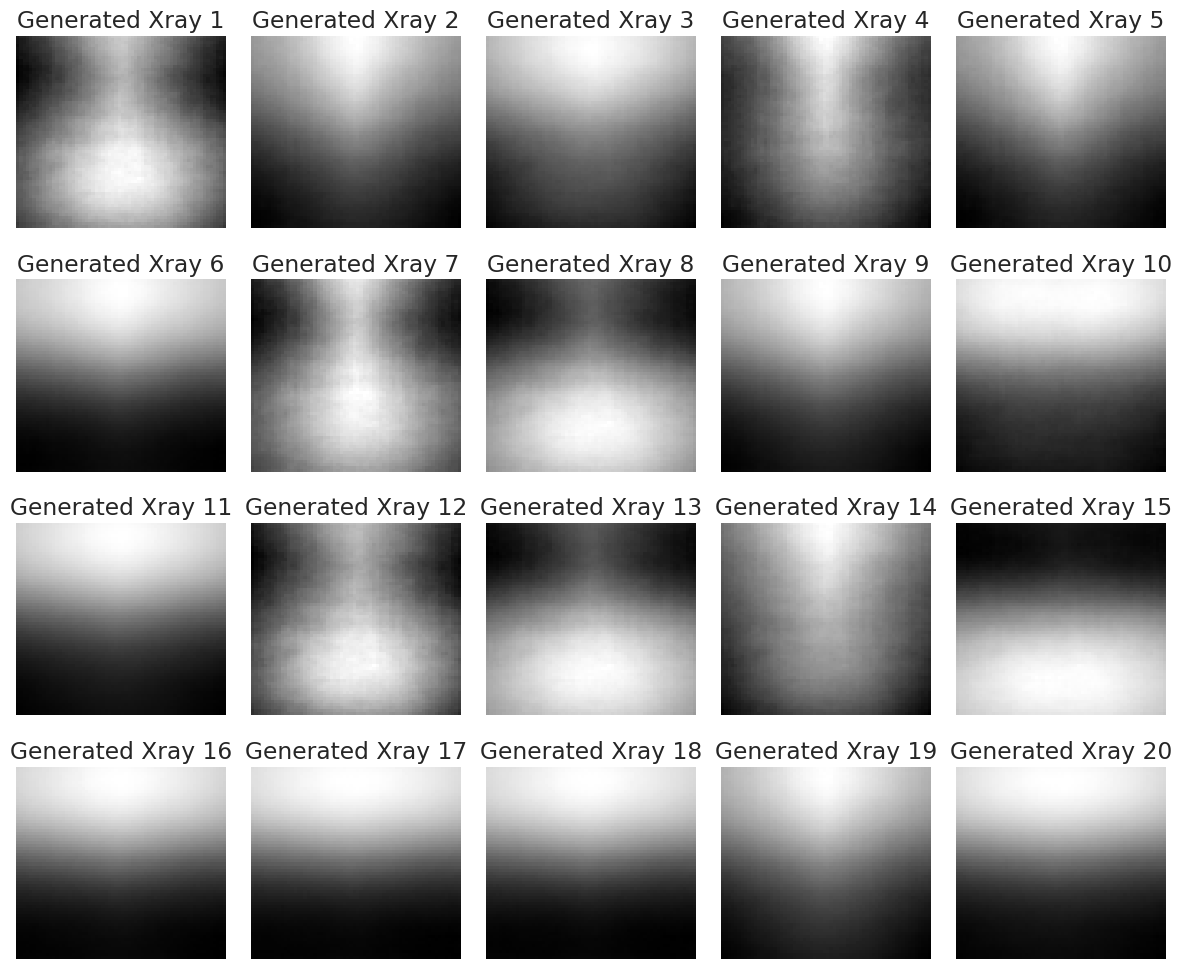

In [88]:
def generate_and_visualize_new_scenes(gmm, pca, n_samples=20, original_image_shape=(64, 64)):
    # Generate samples from the GMM
    generated_samples, _ = gmm.sample(n_samples=n_samples)  # Use the first element of the tuple
    original_samples = pca.inverse_transform(generated_samples)

    # Visualize the generated images
    fig, axes = plt.subplots(4, 5, figsize=(12, 10))
    for i, ax in enumerate(axes.ravel()):
        ax.imshow(original_samples[i].reshape(original_image_shape), cmap='gray', aspect='auto')
        # Reshape to match the original image dimensions
        ax.axis('off')
        ax.set_title(f'Generated Xray {i+1}')

    plt.tight_layout()
    plt.show()

# 'gmm' is your trained Gaussian Mixture Model and 'pca' is the PCA model you applied
generate_and_visualize_new_scenes(gmm, pca, n_samples=20)


#Part 7

In [107]:
# @title Default title text

import os
import numpy as np
import tensorflow as tf
from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from scipy.spatial import procrustes
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import random

np.random.seed(42)
tf.random.set_seed(42)

# Function to load and preprocess images
def load_and_preprocess_images(root_folder, target_size=(64, 64), downsample_factor=0.2):
    images = []
    labels = []

    for category in os.listdir(root_folder):
        category_path = os.path.join(root_folder, category)

        if os.path.isdir(category_path):
            image_files = os.listdir(category_path)

            # Calculate the number of samples to keep based on the downsample factor
            num_samples_to_keep = int(len(image_files) * downsample_factor)

            # Randomly select a subset of samples to achieve balance
            selected_samples = random.sample(image_files, num_samples_to_keep)

            for filename in selected_samples:
                img_path = os.path.join(category_path, filename)

                # Open and resize the img
                img = Image.open(img_path)
                img = img.convert('L')  # Convert images to grayscale
                img_array = np.array(img)  # Convert image to numpy array

                # Resize images to the target size
                img_array = resize(img_array, target_size, anti_aliasing=True)

                images.append(img_array)
                labels.append(category)  # Assuming the category name itself is the label

    return images, labels

# Load and preprocess data
scenes_train = '/tmp/seg_train/seg_train'
scenes_test = '/tmp/seg_test/seg_test'

image_size = (64,64)  # Change this to your desired size

images_train, labels_train = load_and_preprocess_images(scenes_train, image_size,0.5)
images_test, labels_test = load_and_preprocess_images(scenes_test, image_size,0.5)

# # Reshape to match the input shape expected by the CNN
images_train = np.array([resize(img, image_size, anti_aliasing=True) for img in images_train])
images_test = np.array([resize(img, image_size, anti_aliasing=True) for img in images_test])


# One-hot encode labels
labels_train = np.array(pd.get_dummies(labels_train))
labels_test = np.array(pd.get_dummies(labels_test))
#all_labels = np.array(all_labels)

# Data augmentation for the training set
datagen_train = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True  # Allowing vertical flip as well
)

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

validation_fraction = 0.2  # for example, 20% validation data

# Split the training data into training and validation sets
images_train, images_val, labels_train, labels_val = train_test_split(
    images_train, labels_train, test_size=validation_fraction, random_state=42
)

# Reshape the data if needed
image_size = images_train.shape[1]  # assuming images_train is a numpy array
images_train = images_train.reshape(-1, image_size, image_size, 1)
images_val = images_val.reshape(-1, image_size, image_size, 1)


x_train = images_train
y_train = labels_train
x_val = images_val
y_val = labels_val

# Build a simplified model
model = Sequential()

def add_conv_block(model, filters, kernel_size=(6, 6), pool_size=(2, 2), dropout_rate=0.25):
    model.add(Conv2D(filters, kernel_size, activation='relu', padding='same', input_shape=(image_size, image_size, 1)))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

# Add convolutional blocks
add_conv_block(model, 32)
add_conv_block(model, 32)
add_conv_block(model, 64)
add_conv_block(model, 64)
add_conv_block(model, 128)

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile the model with a smaller learning rate
model.compile(optimizer=Nadam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
history = callbacks.History()

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Learning rate scheduler
def lr_schedule(epoch):
    lr = 0.0001
    if epoch >30:
        lr *= 0.1
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Training with data augmentation
model.fit(datagen_train.flow(x_train, y_train, batch_size=256),
          epochs=20,
          validation_data=(x_val, y_val),
          verbose=1,
          steps_per_epoch=x_train.shape[0] // 256,
          callbacks=[history, early_stopping, lr_scheduler])

Epoch 1/20
21/21 [==============================] - 108s 5s/step - loss: 2.3578 - accuracy: 0.1863 - val_loss: 1.7915 - val_accuracy: 0.1866 - lr: 1.0000e-04
Epoch 2/20
21/21 [==============================] - 102s 5s/step - loss: 1.9595 - accuracy: 0.2112 - val_loss: 1.7908 - val_accuracy: 0.1595 - lr: 1.0000e-04
Epoch 3/20
21/21 [==============================] - 99s 5s/step - loss: 1.8641 - accuracy: 0.2326 - val_loss: 1.7910 - val_accuracy: 0.1866 - lr: 1.0000e-04
Epoch 4/20
21/21 [==============================] - 102s 5s/step - loss: 1.7980 - accuracy: 0.2528 - val_loss: 1.7915 - val_accuracy: 0.1866 - lr: 1.0000e-04
Epoch 5/20
21/21 [==============================] - 102s 5s/step - loss: 1.7573 - accuracy: 0.2726 - val_loss: 1.7929 - val_accuracy: 0.1866 - lr: 1.0000e-04
Epoch 6/20
21/21 [==============================] - 103s 5s/step - loss: 1.7136 - accuracy: 0.3021 - val_loss: 1.7977 - val_accuracy: 0.2472 - lr: 1.0000e-04
Epoch 7/20
21/21 [==============================] - 1

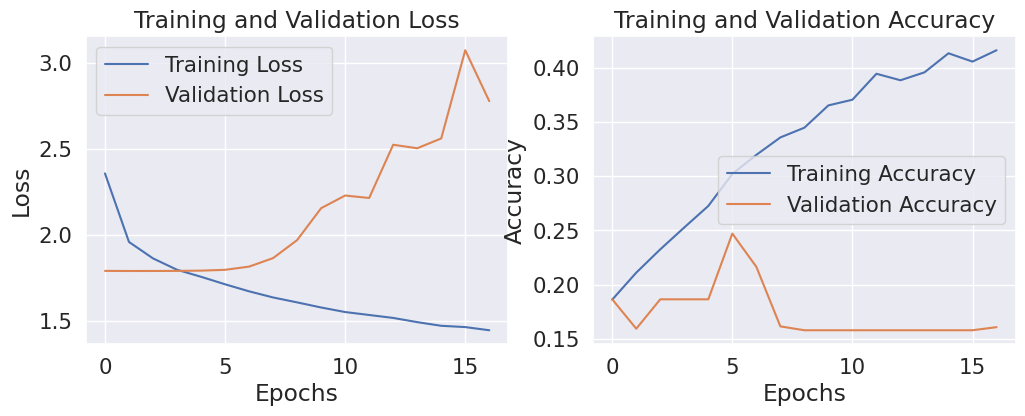

In [108]:
# Plot training and validation loss and accuracy
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The training and validation loss curves aren't converging even with early stopping at 17 epochs, reasons could be:
#Learning Rate:
The learning rate is a crucial hyperparameter. If it's too high, the model might overshoot the minimum, and if it's too low, the model might take a long time to converge or get stuck in a local minimum. Try adjusting the learning rate and observing its impact on convergence.
#Data Augmentation:
While data augmentation is useful, aggressive augmentation can sometimes hinder convergence.
#Data loss:
While reduced the image pixel size to 64,64, data might have been lost causing the curves to be this way.

In [109]:
for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer.name} - {layer.__class__.__name__}")


Layer 0: conv2d_30 - Conv2D
Layer 1: max_pooling2d_29 - MaxPooling2D
Layer 2: batch_normalization_29 - BatchNormalization
Layer 3: dropout_35 - Dropout
Layer 4: conv2d_31 - Conv2D
Layer 5: max_pooling2d_30 - MaxPooling2D
Layer 6: batch_normalization_30 - BatchNormalization
Layer 7: dropout_36 - Dropout
Layer 8: conv2d_32 - Conv2D
Layer 9: max_pooling2d_31 - MaxPooling2D
Layer 10: batch_normalization_31 - BatchNormalization
Layer 11: dropout_37 - Dropout
Layer 12: conv2d_33 - Conv2D
Layer 13: max_pooling2d_32 - MaxPooling2D
Layer 14: batch_normalization_32 - BatchNormalization
Layer 15: dropout_38 - Dropout
Layer 16: conv2d_34 - Conv2D
Layer 17: max_pooling2d_33 - MaxPooling2D
Layer 18: batch_normalization_33 - BatchNormalization
Layer 19: dropout_39 - Dropout
Layer 20: flatten_6 - Flatten
Layer 21: dense_17 - Dense
Layer 22: dropout_40 - Dropout
Layer 23: dense_18 - Dense
Layer 24: dense_19 - Dense


In [110]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 64, 64, 32)        1184      
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_29 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_35 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        36896     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 16, 16, 32)       

Input Layer (Conv2D):

Type: Convolutional layer (2D)
Output Shape: (64, 64, 32)
Parameters: 1184 (including weights and biases)
Description: This layer convolves the input image with 32 filters, each of size 3x3, producing an output feature map with dimensions 64x64x32.
Max Pooling Layer (MaxPooling2D):

Type: Max pooling layer (2D)
Output Shape: (32, 32, 32)
Description: Max pooling is applied to reduce the spatial dimensions of the input feature map by taking the maximum value in each 2x2 region.
Batch Normalization Layer (BatchNormalization):

Type: Batch normalization layer
Output Shape: (32, 32, 32)
Parameters: 128 (scale and offset parameters)
Description: Batch normalization helps stabilize and accelerate training by normalizing the inputs to the layer.
Dropout Layer (Dropout):

Type: Dropout layer
Output Shape: (32, 32, 32)
Description: Dropout is applied to randomly set a fraction of input units to zero during training, preventing overfitting.
Additional Convolutional Blocks (Conv2D, MaxPooling2D, BatchNormalization, Dropout):

Description: Similar convolutional blocks are repeated with increasing filter size (32, 64, 64, 128) and decreasing spatial dimensions due to max pooling. Each block is followed by batch normalization and dropout.
Flatten Layer (Flatten):

Type: Flatten layer
Output Shape: (512,)
Description: Flattens the 3D output to a 1D vector, preparing it for the fully connected layers.
Dense Layer (Dense):

Type: Fully connected (dense) layer
Output Shape: (128,)
Parameters: 65664
Description: Dense layer with 128 neurons and ReLU activation.
Dropout Layer (Dropout):

Type: Dropout layer
Output Shape: (128,)
Description: Dropout applied to the fully connected layer for regularization.
Dense Layer (Dense):

Type: Fully connected (dense) layer
Output Shape: (12,)
Parameters: 1548
Description: Dense layer with 12 neurons, possibly representing an intermediate layer before the final output.
Dense Layer (Dense):

Type: Fully connected (dense) layer
Output Shape: (6,)
Parameters: 78
Description: Final dense layer with 6 neurons, corresponding to the number of classes for classification.
The total number of trainable parameters is 622,362, and the total number of parameters (including non-trainable) is 623,002. The model is designed for image classification into 6 classes, and the input size is expected to be (64, 64, 3) for RGB images.

References:

https://www.kaggle.com/code/puneet6060/image-scene-classification